# Experiment Result for Learning from Demonstration: Provably Efficient Adversarial Policy Imitation with Linear Function Approximation

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import csv
import tensorboard
from scipy.ndimage.filters import gaussian_filter1d
from matplotlib.ticker import MaxNLocator





def AVERAGE(data,factor = 1.0):
    return(gaussian_filter1d(np.array(data), sigma=factor))
def sd_format_plot(result):
    mean , sd = np.mean(result,axis= 0), np.std(result,axis= 0)
    x = range(1,len(mean)+1)
    print(x)
    plt.plot(x,mean) 
    plt.fill_between(x, mean - sd, mean + sd, alpha=0.25)


In [13]:
from train import train_loop
num = 5
full_result = train_loop(num)

expert performance 5.951379739028557
random performance 1.091614581224842
0 -th return: 1.091614581224842
1 -th return: 1.104104310840439
2 -th return: 1.7340875121090962
3 -th return: 3.185830466883625
4 -th return: 4.450616949447475
5 -th return: 5.014733658008033
6 -th return: 5.24625971120764
7 -th return: 5.351921687343107
8 -th return: 5.405296954330322
9 -th return: 5.434301644458682
10 -th return: 5.450882523804912
11 -th return: 5.460700272908853
12 -th return: 5.466653072306949
13 -th return: 5.470313888850769
14 -th return: 5.472575486655839
15 -th return: 5.473962713715964
16 -th return: 5.474793020955615
17 -th return: 5.475262989299209
18 -th return: 5.475496796573942
19 -th return: 5.475574235821119
BC on Expert Demonstration
BC Performance:  5.1717091688650925
BC on Expert Demonstration + Additional Dataset
BC Performance:  1.1320718330078894
expert performance 5.951379739028557
random performance 1.091614581224842
0 -th return: 1.091614581224842
1 -th return: 1.1033927

5
['log', 'exp_perform', 'rand_perform', 'BC_exp', 'BC_rand']
range(1, 21)
range(1, 21)
range(1, 21)
range(1, 21)


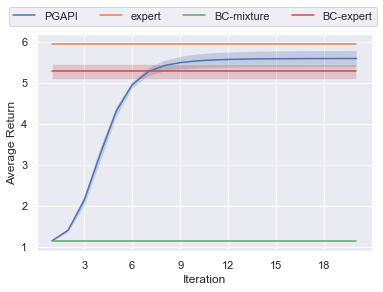

In [9]:

plt.figure(figsize=(6, 4))
sns.set(style="darkgrid")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

legs = []
legs = ["PGAPI","expert","BC-mixture","BC-expert"]
print(len(full_result))

keys = list(full_result.keys())
print(keys)
assert "log" == keys[0]

for i,key in enumerate(keys):
    if i ==2 :
        continue
    result = full_result[key]
    result = AVERAGE(result)
    if key == "log":
        keep = result
    else:
        result = result.reshape(-1,1)
        result = result* np.ones_like(keep)
    sd_format_plot(result)
    #legs.append(key)
plt.legend(legs,ncol = len(legs),loc='upper left', bbox_to_anchor=(-0.1, 1.15))
plt.xlabel('Iteration')
plt.ylabel('Average Return')
        

plt.grid('w')
plt.show()
#plt.savefig('result_GAIL.pdf',format='pdf', bbox_inches='tight', dpi=300)
